# MA934 Numerical Methods - Workbook 3

If you haven't already done so, install the DualNumbers Julia package. It is a good idea to update all your packages first. The commands are

>Pkg.update()

>Pkg.add("DualNumbers")

but you only need to run them once. 

In [1]:
# Pkg.update()
# Pkg.add("DualNumbers")
using Plots
using DualNumbers
pyplot()
include("workbook3functions.jl")

Goldensec (generic function with 1 method)

## Question 1: Numerical differentiation

**1))** Derive a finite difference formula for the derivative of a function, $f$ at a point $x$ using the 3-point stencil $(x, x+h, x+2h)$ and state the order of the approximation error in terms of $h$.

**2)** Write a formula for the derivative, $f^\prime(x)$, of the function

$$f(x) = \sin(\exp(x)) $$

and evaluate it at $x=1$.

**3)** Use your finite difference formula to approximate the value of $f^\prime(1)$ for values of $h$ decreasing from $2^{-1}$ to $2^{-30}$ in powers of $2$. Plot the error as a function of $h$ and verify the theoretically predicted scaling of the error with $h$. What is the best relative error you can achieve?

**4)** Read the examples at https://github.com/JuliaDiff/DualNumbers.jl. Define a dual number $x = 1+\epsilon$ and use it to evaluate $f^\prime(1)$. Verify that the answer is accurate to within machine precision.

$\textbf1)\:$We Taylor expand f at x and x+2h
$$f(x+h)=f(x)+hf'(x)+\frac{1}{2}h^2f''(x)+O(h^3)$$
$$f(x+2h)=f(x)+2hf'(x)+2h^2f''(x)+O(h^3)$$

Then we take linear combination $a_1f(x)+a_2f(x+h)+a_3f(x+2h)$ and choose $a_1,a_2,a_3$ such that the coefficient of $f'(x)$ is 1 and as many others as possible are zero.
$$ f(x):\qquad a_1+a_2+a_3=0$$
$$ f'(x):\qquad a_2+2a_3=1$$
$$f''(x):\qquad a_2+4a_3=0$$
This gives us $a_1=-\frac{3}{2}\quad a_2=2\quad a_3=-\frac{1}{2}$

Then $$f'(x) = \frac{-3f(x)+4f(x+h)-f(x+2h)}{2h} +O(h^2)$$
The order of the approximation error is $h^3$

$\textbf2)$ $$f'(x)=e^xcos(e^x)$$
$$f'(1)=e^1cos(e^1)$$

In [2]:
Dsinexp(1)

-2.478349732955235

__3)__

In [3]:
approx,error,relerror = zeros(30),zeros(30),zeros(30)
for i=1:30
    approx[i]=finitediff3(sinexp,1,2.0^(-i))
    error[i]=abs(approx[i]-(exp(1)*cos(exp(1))))
    relerror[i]=abs(error[i]/(exp(1)*cos(exp(1))))
end


In [4]:
h=zeros(30)
for i=1:30
    h[i]=2.0^(-float(i))
end


In [5]:
println("The smallest relative error is where h=",2 ^-(float(indmin(relerror))))
println("This gives relative error ",minimum(relerror))

The smallest relative error is where h=1.9073486328125e-6
This gives relative error 3.2358031082852225e-11



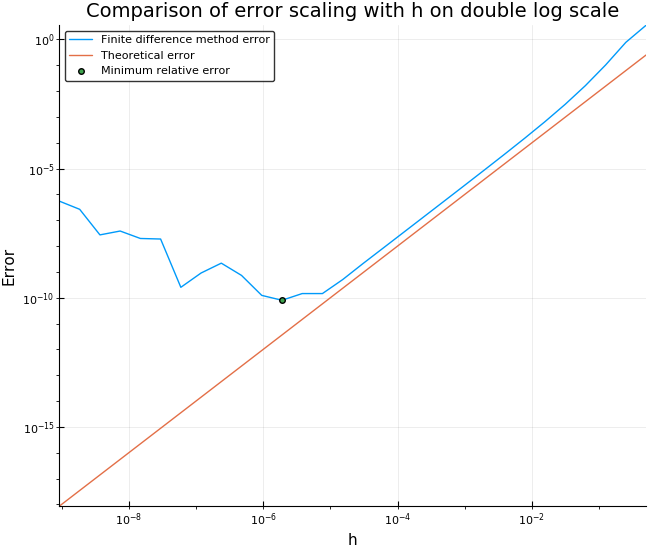

In [6]:
plot(h,error,yscale=:log10,xscale=:log10,label="Finite difference method error")
plot!(h,h.^2,label="Theoretical error")
scatter!([h[19]],[error[19]],label="Minimum relative error")
ylabel!("Error");xlabel!("h");title!("Comparison of error scaling with h on double log scale")
plot!(size=(650,550))

__4)__

In [7]:
x=Dual(1,1)
f(x)=sin(exp(x))
y=f(x);

In [8]:
println("f(x) = sin(exp(x))")
println("f(1) = ", realpart(y))
println("f'(1) = ", dualpart(y))
println("f'(1)==exp(1)cos(exp(1)) ",abs(dualpart(y)==exp(1)*cos(exp(1))))

f(x) = sin(exp(x))
f(1) = 0.41078129050290885
f'(1) = -2.478349732955235
f'(1)==exp(1)cos(exp(1)) true


So the answer is accurate to machin precision.

<font color=blue>
Excellent answer: 15/15
</font>

## Question 2: Finding roots

**1)** Referring to the function, $f(x)$, defined above, find the roots of the equation

$$ f(x) = 0$$

in the interval $0<x<2$.

**2)** Implement the bracketing and bisection method to find one of the roots numerically. Measure the error at each iteration of the algorithm and demonstrate that the error decreases exponentially as a function of the number of iterations. To how many digits of precision can you approximate the root?

**3)** Perform the same measurements for the Newton Raphson method and show that the error decreases faster than exponentially as a function of the number of iterations.

## Question 3: Finding minima

**1)** The function $f(x)$ above has a single minimum in the interval $0<x<2$. Find its location analytically.

**2)** Implement the Golden section search to find the location of this minimum numerically. Plot the error as a function of the number of iterations. To how many digits of precision can you approximate the location of the minimum?

**3)** To understand your empirical findings, use Taylor's Theorem to show that near a minimum, $x_*$, of f(x),

$$f(x) \approx f(x_*)\left( 1+ \frac{f^{\prime\prime}(x_*)}{2\,f(x_*)}\,(x-x_*)^2\right). $$
Show that in order for a computer to distinguish between $f(x)$ and $f(x_*)$ we must have

$$ \left| x-x_*\right| > \sqrt{\epsilon_m}\,\sqrt{\left|\frac{2\,f(x_*)}{f^{\prime\prime}(x_*)}\right|}$$

thus limiting the precision with which the location of a minimum can be determined.